In [197]:
import os
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
import numpy as np
from os import listdir
from skimage import io
from scipy.misc import imresize
import keras
from keras.optimizers import Adam
import pandas as pd
import pylab as plt

In [198]:
img_size = 64
batch_size = 128
epochs = 5

# load image
data_path='C:/Users/pli6894/Desktop/Train_Data/'
labels = listdir(data_path)
x_cat=[];
x_dog=[];



In [199]:
cat_imgpath = listdir(data_path+'/'+labels[0])
dog_imgpath = listdir(data_path+'/'+labels[1])

for img in cat_imgpath:
    cat_img = io.imread(data_path+'/'+labels[0]+'/'+img)
    x_cat.append(imresize(cat_img, (img_size, img_size, 3)))
    y_cat=np.ones(len(cat_imgpath))
for img in dog_imgpath:
    dog_img = io.imread(data_path + '/' + labels[1] + '/' + img)
    x_dog.append(imresize(dog_img, (img_size, img_size, 3)))

y_cat = np.zeros(len(cat_imgpath))
y_dog = np.ones(len(dog_imgpath))

x=np.asarray(x_cat+x_dog)
y=np.append(y_cat,y_dog)

C:\Users\pli6894\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  
C:\Users\pli6894\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  # Remove the CWD from sys.path while we load stuff.


In [200]:
catImages = listdir(data_path+'/'+labels[0])
print ("Number of Cat images - ",str(len(catImages)))

dogImages = listdir(data_path+'/'+labels[1])
print ("Number of Dog images - ",str(len(dogImages)))

Number of Cat images -  700
Number of Dog images -  699


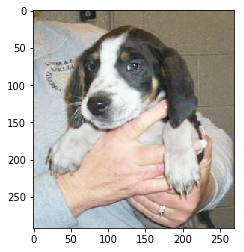

In [201]:
from PIL import Image
import random

dogFilename = 'C:/Users/pli6894/Desktop/Train_Data/dog/'+dogImages[2]
dimage = Image.open(dogFilename)

plt.imshow(dimage)

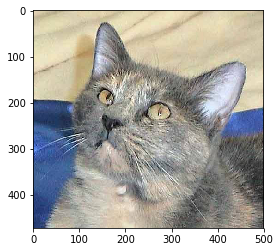

In [202]:
catFilename = 'C:/Users/pli6894/Desktop/Train_Data/cat/'+catImages[28]
cimage = Image.open(catFilename)

plt.imshow(cimage)

In [203]:
y = keras.utils.to_categorical(y)
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.1, random_state=300)

In [283]:
train_x

array([[[[ 39,  41,  40],
         [ 48,  50,  49],
         [ 49,  51,  50],
         ...,
         [ 53,  53,  59],
         [ 48,  49,  54],
         [ 43,  44,  49]],

        [[ 42,  44,  43],
         [ 45,  47,  46],
         [ 45,  47,  46],
         ...,
         [ 53,  53,  58],
         [ 50,  51,  56],
         [ 46,  47,  52]],

        [[ 46,  48,  47],
         [ 47,  49,  48],
         [ 49,  51,  50],
         ...,
         [ 56,  55,  61],
         [ 48,  49,  54],
         [ 42,  44,  48]],

        ...,

        [[ 84,  83,  87],
         [ 78,  76,  75],
         [ 89,  87,  90],
         ...,
         [ 84,  77,  72],
         [ 78,  72,  68],
         [ 70,  67,  64]],

        [[ 81,  80,  83],
         [ 81,  77,  77],
         [ 90,  85,  87],
         ...,
         [ 79,  74,  70],
         [ 78,  73,  70],
         [ 74,  69,  66]],

        [[ 79,  76,  77],
         [ 82,  76,  73],
         [ 88,  79,  82],
         ...,
         [ 76,  71,  68],
        

Basic Model (no changes) -- Does not converge

In [238]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_size, img_size, 3)))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Dropout(0.1))
model.add(Activation('sigmoid'))
model.add(Dense(2))
model.add(Activation('softmax'))
adamop=Adam(lr=0.1)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
h = model.fit(train_x, train_y, validation_data=(test_x, test_y),
 batch_size=batch_size,
 epochs=epochs,
 shuffle=True)
score = model.evaluate(test_x, test_y)
pred=model.predict(test_x)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 1259 samples, validate on 140 samples
Epoch 1/5
1259/1259 [==============================] - 7s 6ms/step - loss: 2.2018 - acc: 0.5052 - val_loss: 2.5034 - val_acc: 0.4643
Epoch 2/5
1259/1259 [==============================] - 5s 4ms/step - loss: 1.7253 - acc: 0.5036 - val_loss: 1.8690 - val_acc: 0.4643
Epoch 3/5
1259/1259 [==============================] - 5s 4ms/step - loss: 1.2064 - acc: 0.5036 - val_loss: 1.3253 - val_acc: 0.4643
Epoch 4/5
1259/1259 [==============================] - 5s 4ms/step - loss: 0.8693 - acc: 0.5028 - val_loss: 0.9630 - val_acc: 0.4643
Epoch 5/5
140/140 [==============================] - 0s 2ms/step
Test loss: 0.8067815933908735
Test accuracy: 0.4642857142857143


In [239]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_100 (Conv2D)          (None, 62, 62, 32)        896       
_________________________________________________________________
activation_96 (Activation)   (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
flatten_33 (Flatten)         (None, 30752)             0         
_________________________________________________________________
dense_55 (Dense)             (None, 64)                1968192   
_________________________________________________________________
dropout_16 (Dropout)         (None, 64)                0         
_________________________________________________________________
activation_97 (Activation)   (None, 64)                0         
__________

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


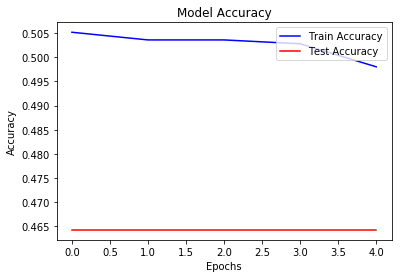

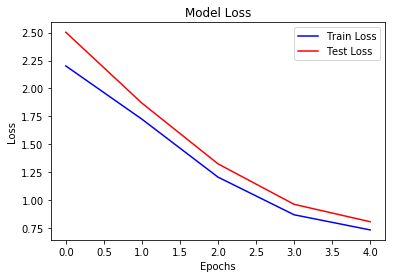

In [241]:
#Plot Accuracy & Loss for basic model

print(h.history.keys())
fig = plt.figure()
plt.plot(h.history['acc'], color='blue')
plt.plot(h.history['val_acc'], color='red')
plt.legend(['Train Accuracy', 'Test Accuracy'], loc='upper right')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
fig

fig2 = plt.figure()
plt.plot(h.history['loss'], color ='blue')
plt.plot(h.history['val_loss'],color ='red')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.show()


In [211]:
model.reset_states() #clear previous model weights

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_size, img_size, 3)))
model.add(Activation('relu'))
model.add(Conv2D(16, 5)) #new convolution layer
model.add(Activation('relu')) #activation function for new layer
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(2))
model.add(Activation('softmax'))
adamop=Adam(lr=0.1)
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [212]:
h = model.fit(train_x, train_y, validation_data=(test_x, test_y),
 batch_size=128,
 epochs=50,
 shuffle=True)
score = model.evaluate(test_x, test_y)
pred=model.predict(test_x)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 1259 samples, validate on 140 samples
Epoch 1/5
1259/1259 [==============================] - 26s 21ms/step - loss: 7.7038 - acc: 0.5091 - val_loss: 8.5876 - val_acc: 0.4643
Epoch 2/5
1259/1259 [==============================] - 27s 21ms/step - loss: 7.9578 - acc: 0.5036 - val_loss: 8.5876 - val_acc: 0.4643
Epoch 3/5
1259/1259 [==============================] - 30s 24ms/step - loss: 7.9578 - acc: 0.5036 - val_loss: 8.5876 - val_acc: 0.4643
Epoch 4/5
1259/1259 [==============================] - 25s 20ms/step - loss: 7.9578 - acc: 0.5036 - val_loss: 8.5876 - val_acc: 0.4643
Epoch 5/5
140/140 [==============================] - 1s 7ms/step
Test loss: 8.587628255571637
Test accuracy: 0.4642857142857143


In [213]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_80 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
activation_63 (Activation)   (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 58, 58, 16)        12816     
_________________________________________________________________
activation_64 (Activation)   (None, 58, 58, 16)        0         
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 29, 29, 16)        0         
_________________________________________________________________
flatten_26 (Flatten)         (None, 13456)             0         
_________________________________________________________________
dense_42 (Dense)             (None, 2)                 26914     
__________

In [214]:
model.reset_states() #clear previous model weights

model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(img_size, img_size, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(16, (5, 5))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(120, (5, 5))) 
model.add(Activation('relu')) 
model.add(Flatten())
model.add(Dense(84))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_82 (Conv2D)           (None, 60, 60, 32)        2432      
_________________________________________________________________
activation_66 (Activation)   (None, 60, 60, 32)        0         
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 26, 26, 16)        12816     
_________________________________________________________________
activation_67 (Activation)   (None, 26, 26, 16)        0         
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 9, 9, 120)         48120     
__________

In [215]:
h = model.fit(train_x, train_y, validation_data=(test_x, test_y),
 batch_size=128,
 epochs=5,
 shuffle=True)
score = model.evaluate(test_x, test_y)
pred=model.predict(test_x)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 1259 samples, validate on 140 samples
Epoch 1/5
1259/1259 [==============================] - 12s 10ms/step - loss: 7.7513 - acc: 0.4948 - val_loss: 7.4426 - val_acc: 0.5357
Epoch 2/5
1259/1259 [==============================] - 12s 10ms/step - loss: 8.0724 - acc: 0.4964 - val_loss: 7.4426 - val_acc: 0.5357
Epoch 3/5
1259/1259 [==============================] - 13s 10ms/step - loss: 8.0724 - acc: 0.4964 - val_loss: 7.4426 - val_acc: 0.5357
Epoch 4/5
1259/1259 [==============================] - 13s 10ms/step - loss: 8.0724 - acc: 0.4964 - val_loss: 7.4426 - val_acc: 0.5357
Epoch 5/5
140/140 [==============================] - 1s 4ms/step
Test loss: 7.4426110676356725
Test accuracy: 0.5357142857142857


Investigate Kernal Size

In [249]:
def tryNewFilterSizeFn(h,w):
    model = Sequential()
    model.add(Conv2D(32, (h,w), input_shape=(img_size, img_size, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2))) #MaxPooling2D
    model.add(Conv2D(16, (h,w))) 
    model.add(Activation('relu')) 
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(120, (h,w))) 
    model.add(Activation('relu')) 
    model.add(Flatten())
    model.add(Dense(84))
    model.add(Activation('relu'))
    model.add(Dense(2))
    model.add(Activation('softmax'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    model.fit(train_x, train_y,
    batch_size=batch_size,
    verbose = 0,
    epochs=5,
    shuffle=True)

    score = model.evaluate(test_x, test_y)
    pred=model.predict(test_x)
    loss = score[0]
    acc = score[1]
    return acc,loss

In [250]:
h_list = [3,3,1,9]
w_list = [3,1,3,1]

for h,w in map(lambda x,y:(x,y),h_list,w_list):
    print('Filter Size : '+str(h)+','+str(w))
    acc, loss = tryNewFilterSizeFn(h,w)
    print('Test loss:', loss)
    print('Test accuracy:', acc)

Filter Size : 3,3
140/140 [==============================] - 2s 11ms/step
Test loss: 8.587628255571637
Test accuracy: 0.4642857142857143
Filter Size : 3,1
140/140 [==============================] - 1s 10ms/step
Test loss: 7.4426110676356725
Test accuracy: 0.5357142857142857
Filter Size : 1,3
140/140 [==============================] - 1s 7ms/step
Test loss: 7.4426110676356725
Test accuracy: 0.5357142857142857
Filter Size : 9,1
140/140 [==============================] - 1s 8ms/step
Test loss: 7.4426110676356725
Test accuracy: 0.5357142857142857


In [246]:
def tryNewActivationFn(conv_act, dense_act, output_act):
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(img_size, img_size, 3)))
    model.add(Activation(conv_act))
    model.add(MaxPooling2D(pool_size=(2, 2))) #MaxPooling2D
    model.add(Conv2D(16, (5, 5))) 
    model.add(Activation(conv_act)) 
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(120, (5, 5))) 
    model.add(Activation(conv_act)) 
    model.add(Flatten())
    model.add(Dense(84))
    model.add(Activation(dense_act))
    model.add(Dense(2))
    model.add(Activation(output_act))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    model.fit(train_x, train_y,
    batch_size=batch_size,
    verbose = 0,
    epochs=5,
    shuffle=True)

    score = model.evaluate(test_x, test_y)
    pred=model.predict(test_x)
    loss = score[0]
    acc = score[1]
    return acc,loss

In [247]:
convolution_fns = ['relu']
dense_fns = ['relu','tanh']
output_fns = ['softmax','sigmoid']

In [248]:
for conv_fn in convolution_fns:
    model.reset_states() #clear previous model weights
    for dense_fn in dense_fns:
        for output_fn in output_fns:
            print('Convolution Activation:', conv_fn, '| Hidden Activation:', dense_fn, '| Output Activation:', output_fn)
            acc, loss = tryNewActivationFn(conv_fn,dense_fn, output_fn)
            print('Test loss:', loss)
            print('Test accuracy:', acc)

Convolution Activation: relu | Hidden Activation: relu | Output Activation: softmax
140/140 [==============================] - 1s 8ms/step
Test loss: 7.4426110676356725
Test accuracy: 0.5357142857142857
Convolution Activation: relu | Hidden Activation: relu | Output Activation: sigmoid
140/140 [==============================] - 1s 10ms/step
Test loss: 8.05904769897461
Test accuracy: 0.5
Convolution Activation: relu | Hidden Activation: tanh | Output Activation: softmax
140/140 [==============================] - 2s 11ms/step
Test loss: 0.6938812051500592
Test accuracy: 0.4642857142857143
Convolution Activation: relu | Hidden Activation: tanh | Output Activation: sigmoid
140/140 [==============================] - 1s 10ms/step
Test loss: 0.692416490827288
Test accuracy: 0.5357142857142857


In [254]:
model.reset_states() #clear previous model weights

model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(img_size, img_size, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #MaxPooling2D
model.add(Conv2D(16, (5, 5))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(120, (5, 5))) 
model.add(Activation('relu')) 
model.add(Flatten())
model.add(Dense(84))
model.add(Activation('tanh'))
model.add(Dense(2))
model.add(Activation('sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_146 (Conv2D)          (None, 60, 60, 32)        2432      
_________________________________________________________________
activation_174 (Activation)  (None, 60, 60, 32)        0         
_________________________________________________________________
max_pooling2d_83 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_147 (Conv2D)          (None, 26, 26, 16)        12816     
_________________________________________________________________
activation_175 (Activation)  (None, 26, 26, 16)        0         
_________________________________________________________________
max_pooling2d_84 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_148 (Conv2D)          (None, 9, 9, 120)         48120     
__________

In [255]:
h = model.fit(train_x, train_y, validation_data=(test_x, test_y),
 batch_size=128,
 epochs=5,
 shuffle=True)

score = model.evaluate(test_x, test_y)
pred=model.predict(test_x)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 1259 samples, validate on 140 samples
Epoch 1/5
1259/1259 [==============================] - 14s 11ms/step - loss: 1.3986 - acc: 0.4968 - val_loss: 1.1910 - val_acc: 0.5000
Epoch 2/5
1259/1259 [==============================] - 11s 8ms/step - loss: 1.0475 - acc: 0.5000 - val_loss: 0.9704 - val_acc: 0.5000
Epoch 3/5
1259/1259 [==============================] - 11s 9ms/step - loss: 0.8671 - acc: 0.4956 - val_loss: 0.8275 - val_acc: 0.4643
Epoch 4/5
1259/1259 [==============================] - 11s 9ms/step - loss: 0.7599 - acc: 0.5036 - val_loss: 0.7373 - val_acc: 0.4643
Epoch 5/5
140/140 [==============================] - 1s 4ms/step
Test loss: 0.6999547668865749
Test accuracy: 0.4642857142857143


In [258]:
model.reset_states() #clear previous model weights

model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(img_size, img_size, 3)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(16, (5, 5))) 
model.add(Activation('relu')) 
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(120, (5, 5))) 
model.add(Activation('relu')) 
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(84))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(2))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_152 (Conv2D)          (None, 60, 60, 32)        2432      
_________________________________________________________________
activation_184 (Activation)  (None, 60, 60, 32)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 60, 60, 32)        0         
_________________________________________________________________
max_pooling2d_87 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_153 (Conv2D)          (None, 26, 26, 16)        12816     
_________________________________________________________________
activation_185 (Activation)  (None, 26, 26, 16)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 26, 26, 16)        0         
__________

In [259]:
h = model.fit(train_x, train_y, validation_data=(test_x, test_y),
 batch_size=128,
 epochs=5,
 shuffle=True)
score = model.evaluate(test_x, test_y)
pred=model.predict(test_x)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 1259 samples, validate on 140 samples
Epoch 1/5
1259/1259 [==============================] - 17s 14ms/step - loss: 8.0548 - acc: 0.4909 - val_loss: 7.4426 - val_acc: 0.5357
Epoch 2/5
1259/1259 [==============================] - 15s 12ms/step - loss: 8.0724 - acc: 0.4964 - val_loss: 7.4426 - val_acc: 0.5357
Epoch 3/5
1259/1259 [==============================] - 16s 13ms/step - loss: 8.0724 - acc: 0.4964 - val_loss: 7.4426 - val_acc: 0.5357
Epoch 4/5
1259/1259 [==============================] - 16s 13ms/step - loss: 8.0724 - acc: 0.4964 - val_loss: 7.4426 - val_acc: 0.5357
Epoch 5/5
140/140 [==============================] - 1s 4ms/step
Test loss: 7.4426110676356725
Test accuracy: 0.5357142857142857


Cost Function & Optimizers

In [268]:
def tryNewOptFn(opt):
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(img_size, img_size, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2))) #MaxPooling2D
    model.add(Conv2D(16, (5, 5))) 
    model.add(Activation('relu')) 
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(120, (5, 5))) 
    model.add(Activation('relu')) 
    model.add(Flatten())
    model.add(Dense(84))
    model.add(Activation('tanh'))
    model.add(Dropout(rate = 0.2)) #adding dropout to our hidden layer 
    model.add(Dense(2))
    model.add(Activation('softmax'))

    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

    model.fit(train_x, train_y,
    batch_size=batch_size,
    verbose = 0,
    epochs=epochs,
    shuffle=True)

    score = model.evaluate(test_x, test_y)
    pred=model.predict(test_x)
    loss = score[0]
    acc = score[1]
    return acc,loss

In [269]:
opt_list = ['sgd','adam','adamax','adagrad']

In [270]:
for opt in opt_list:
    print('Optimizer:', opt)
    acc, loss = tryNewOptFn(opt)
    print('Test loss:', loss)
    print('Test accuracy:', acc)

Optimizer: sgd
140/140 [==============================] - 2s 13ms/step
Test loss: 0.6907795480319432
Test accuracy: 0.5357142857142857
Optimizer: adam
140/140 [==============================] - 2s 11ms/step
Test loss: 0.6974865589823042
Test accuracy: 0.4642857142857143
Optimizer: adamax
140/140 [==============================] - 2s 11ms/step
Test loss: 0.6960354958261762
Test accuracy: 0.4642857142857143
Optimizer: adagrad
140/140 [==============================] - 2s 12ms/step
Test loss: 0.6948471001216343
Test accuracy: 0.4642857142857143


VISUALIZE THE CNN

In [271]:
# Visualize the CNN: https://www.kaggle.com/amarjeet007/visualize-cnn-with-keras

In [284]:
from keras.callbacks import ModelCheckpoint,LearningRateScheduler
import math

def step_decay(epoch):
    
    
    initial_lrate=0.01
    drop=0.6
    epochs_drop = 3.0
    lrate= initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
    return lrate
   

lrate = LearningRateScheduler(step_decay)
callbacks_list = [ lrate]

In [285]:
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(img_size, img_size, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #AveragePooling2D
model.add(Conv2D(16, (5, 5))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(120, (5, 5))) 
model.add(Activation('relu')) 
model.add(Flatten())
model.add(Dense(84))
model.add(Activation('tanh'))
model.add(Dropout(rate = 0.2)) #adding dropout to our hidden layer 
model.add(Dense(2))
model.add(Activation('sigmoid'))
model.summary()
  
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_182 (Conv2D)          (None, 60, 60, 32)        2432      
_________________________________________________________________
activation_234 (Activation)  (None, 60, 60, 32)        0         
_________________________________________________________________
max_pooling2d_107 (MaxPoolin (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_183 (Conv2D)          (None, 26, 26, 16)        12816     
_________________________________________________________________
activation_235 (Activation)  (None, 26, 26, 16)        0         
_________________________________________________________________
max_pooling2d_108 (MaxPoolin (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_184 (Conv2D)          (None, 9, 9, 120)         48120     
__________

In [303]:
history=model.fit(train_x, train_y, validation_data=(test_x, test_y),
                          epochs=50,callbacks=callbacks_list,verbose=0)

score = model.evaluate(test_x, test_y)
pred=model.predict(test_x)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

140/140 [==============================] - 0s 4ms/step
Test loss: 0.6937829273087638
Test accuracy: 0.4642857142857143


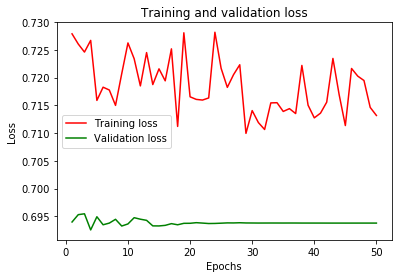

In [304]:
#Training & Validation Loss

import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

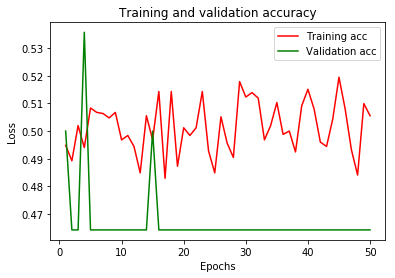

In [305]:
# Training & Validation Accuracy

acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [296]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(train_x[35].reshape(1,64,64,3))
 
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

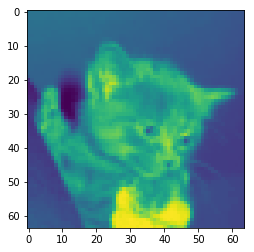

In [297]:
plt.imshow(train_x[35][:,:,0]);

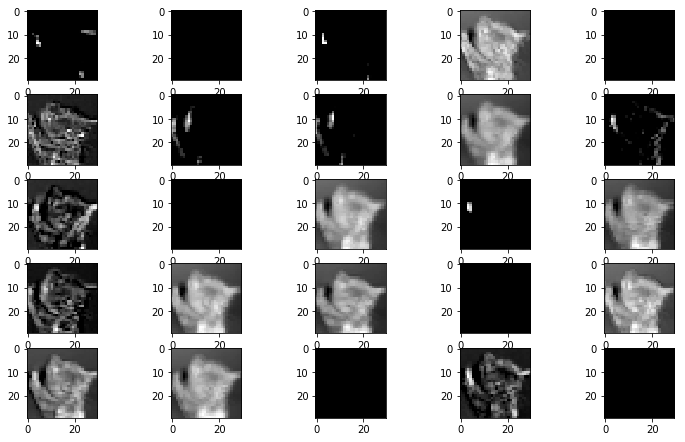

In [298]:
display_activation(activations, 5, 5, 2) #convolution one 

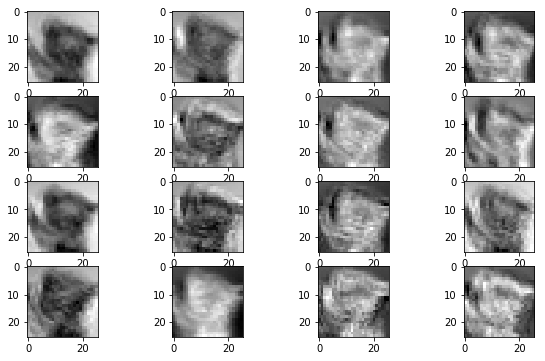

In [299]:
display_activation(activations, 4, 4, 3) #max pool one 

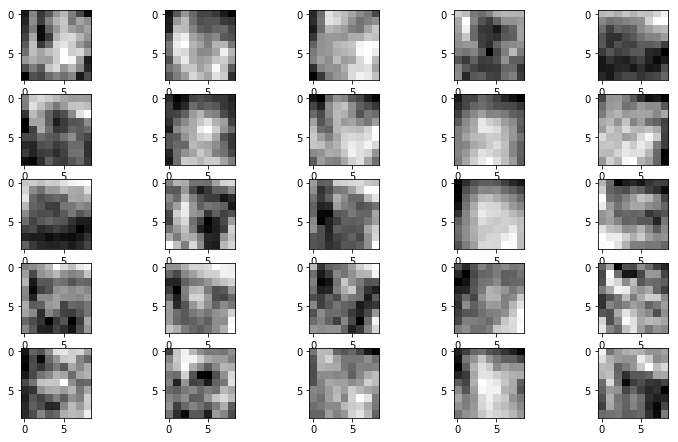

In [300]:
display_activation(activations, 5, 5, 6) # convolution 2